In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing  import StandardScaler

import matplotlib.pyplot as plt

In [4]:
from bdd import ConnexionMongoDB

conn = ConnexionMongoDB()
data = conn.userTweets(10000)


In [5]:
# standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# use K-means

kmeans = KMeans(random_state=42)
kmeans.fit(scaled_features)

KMeans(random_state=42)

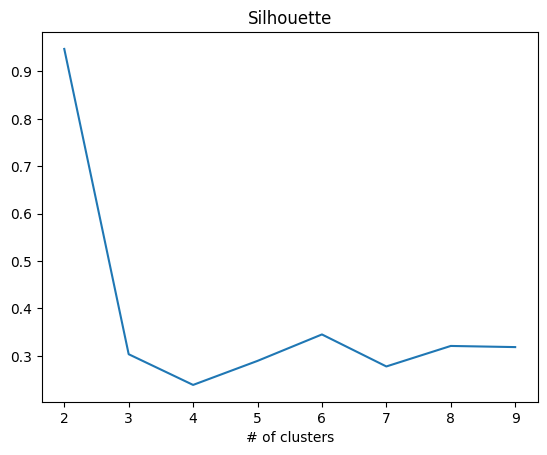

In [7]:
res = []
for k in range(2,10):
    km = cluster.KMeans(n_clusters=k).fit(scaled_features)
    res.append(metrics.silhouette_score(scaled_features,km.labels_))

plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,10,1),res)
plt.show()

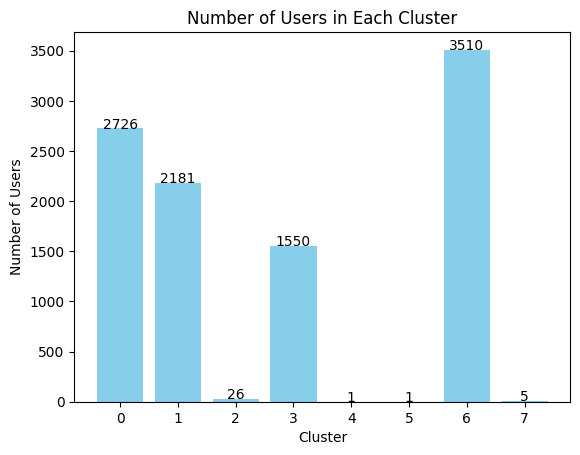

In [8]:
labels = kmeans.labels_

unique_labels, counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Cluster')
plt.xticks(unique_labels)

for i, count in enumerate(counts):
    plt.text(unique_labels[i], count + 0.1, str(count), ha='center')

plt.show()

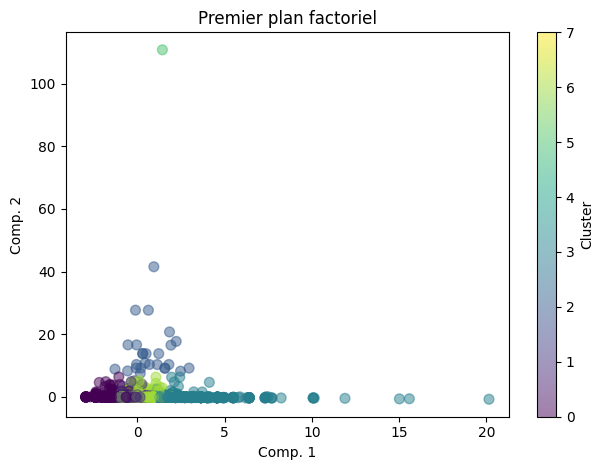

In [9]:
from sklearn.decomposition import PCA

# ACP
acp = PCA()
coord = acp.fit_transform(scaled_features)
plt.scatter(coord[:, 0], coord[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Premier plan factoriel')
plt.xlabel('Comp. 1')
plt.ylabel('Comp. 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show() 

In [10]:
# use K-means

kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(scaled_features)

KMeans(n_clusters=2, random_state=42)

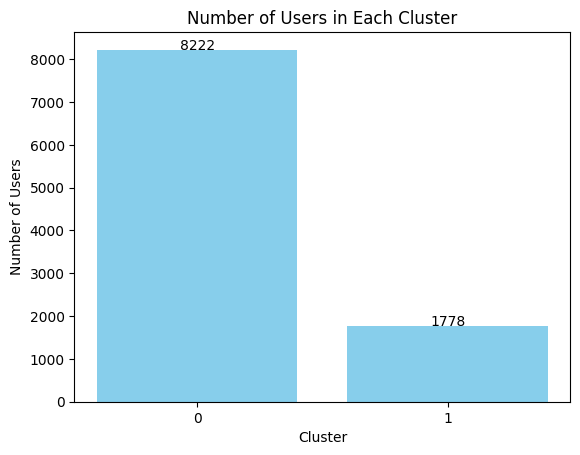

In [11]:
labels2 = kmeans2.labels_

unique_labels2, counts2 = np.unique(labels2, return_counts=True)

plt.bar(unique_labels2, counts2, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Cluster')
plt.xticks(unique_labels2)

for i, count in enumerate(counts2):
    plt.text(unique_labels2[i], count + 0.1, str(count), ha='center')

plt.show()

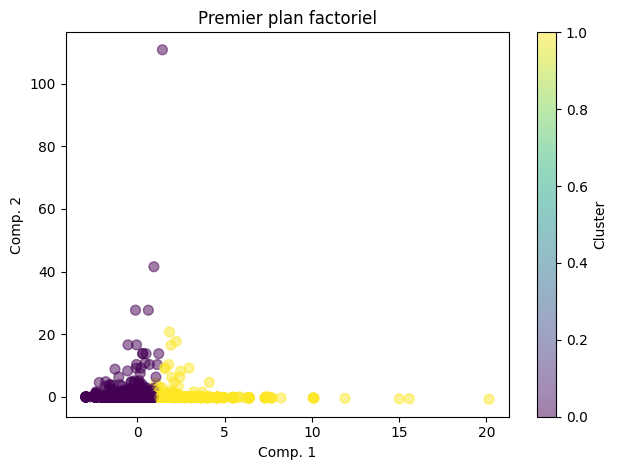

In [12]:
from sklearn.decomposition import PCA
data_cr = StandardScaler().fit_transform(data.values)

# ACP
acp = PCA()
coord = acp.fit_transform(data_cr)
plt.scatter(coord[:, 0], coord[:, 1], c=labels2, cmap='viridis', s=50, alpha=0.5)
plt.title('Premier plan factoriel')
plt.xlabel('Comp. 1')
plt.ylabel('Comp. 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show() 